In [14]:
from ppget.source import ModelSource
import matplotlib as mplt
mplt.rcParams["figure.figsize"] = (20,5)

start_date = "2007-07-01"
end_date = "2007-07-08"
feature = "Global_active_power"

source = ModelSource.load(start_date, end_date, feature)
source.missing_data()

Series([], Freq: H, Name: Global_active_power, dtype: float64)

In [15]:
series = source.series()
series.head()

timestamp
2007-07-01 00:00:00    2.493733
2007-07-01 01:00:00    0.990900
2007-07-01 02:00:00    0.789900
2007-07-01 03:00:00    0.287467
2007-07-01 04:00:00    0.515533
Freq: H, Name: Global_active_power, dtype: float64

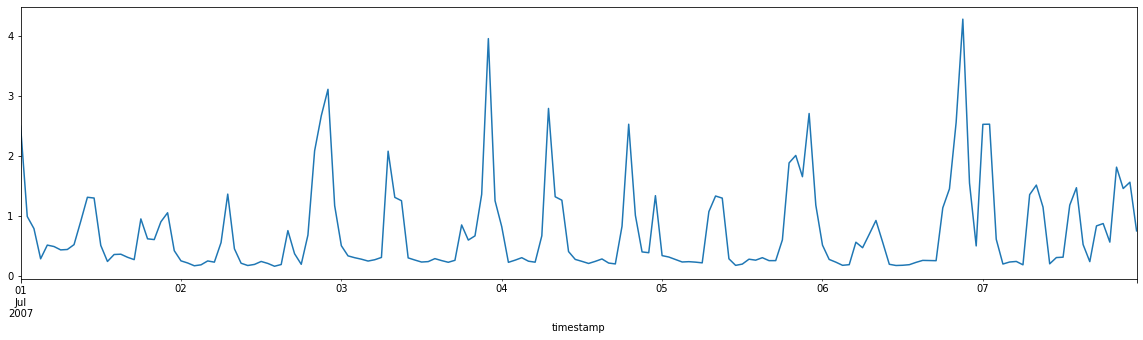

In [16]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)

series.plot()
plt.show()

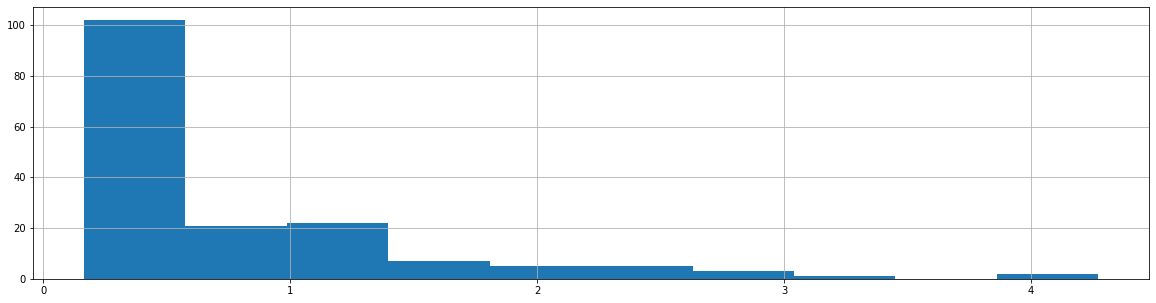

In [17]:
series.hist()
plt.show()

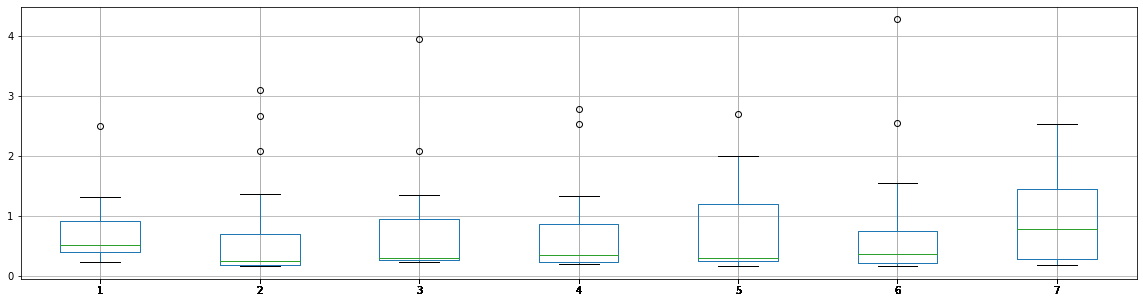

In [18]:
import pandas as pd

pd.DataFrame(series).set_index(series.index.day, append=True).unstack().boxplot()
plt.xticks(series.index.day, list(series.index.day))
plt.show()

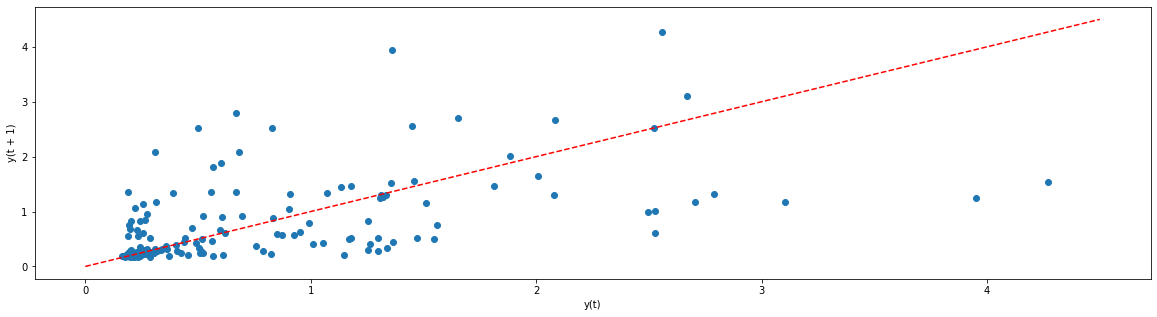

In [19]:
pd.plotting.lag_plot(series)
ident = [0.0, 4.5]
plt.plot(ident,ident, color="red", linestyle="--")
plt.show()

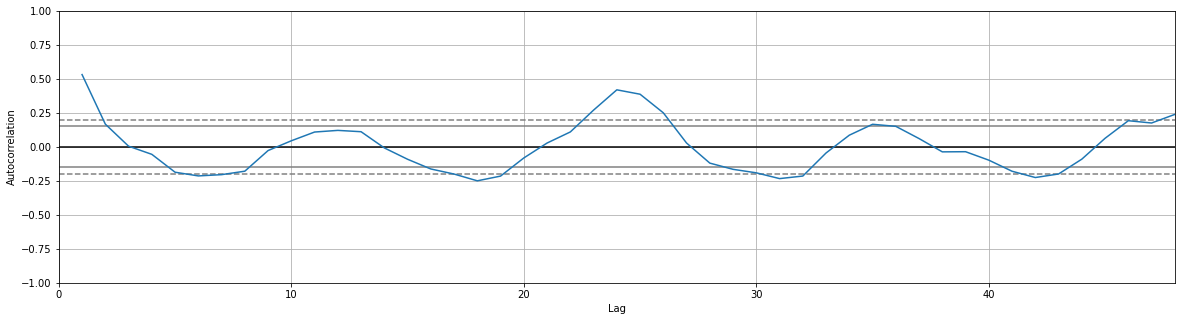

In [20]:
pd.plotting.autocorrelation_plot(series)
plt.xlim([0, 48])
plt.show()

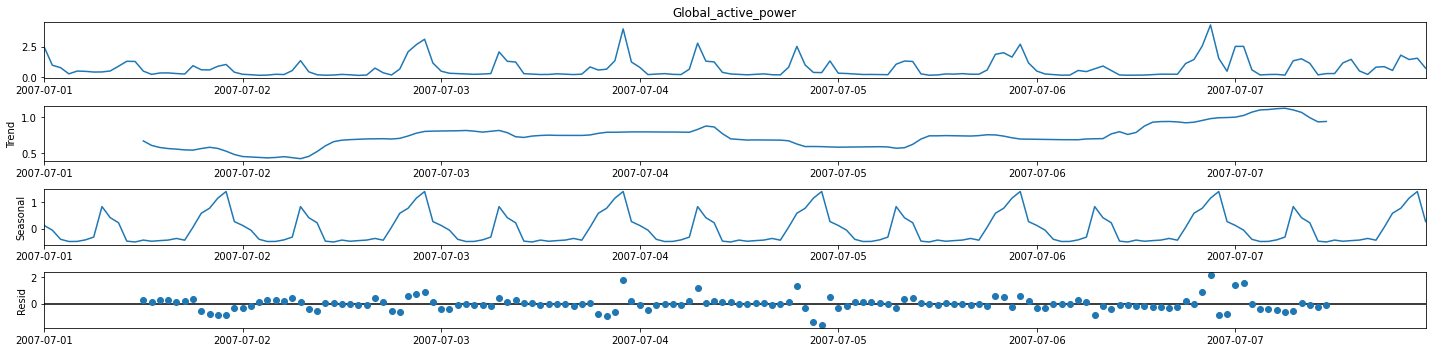

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(series, model='additive').plot()
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller

X = series.values
result = adfuller(X)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]:0.10f}")
print('Critical Values:')
for key, value in result[4].items():
    print(f"\t{key}: {value}")

ADF Statistic: -6.438599176656573
p-value: 0.0000000163
Critical Values:
	1%: -3.471118535474365
	5%: -2.8794405060097024
	10%: -2.576313761526591
